<a href="https://colab.research.google.com/github/AnnaBicelli/Airbnb_Open_Data_project/blob/main/Modeling_Airbnb_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I use Google Colab to do the modeling part because I had serious problems importing the sklearn library in VSCode.<br>I also do the first part of the project here that I've done in the Airbnb_Open_Data_project file so that I've the DataFrame set up correctly.

https://github.com/AnnaBicelli/another-try-.git

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [109]:
pd.set_option('display.max_columns', None)

In [110]:
!unzip Airbnb_Open_Data.zip

Archive:  Airbnb_Open_Data.zip
  inflating: Airbnb_Open_Data.csv    


In [111]:
airbnb_df = pd.read_csv('Airbnb_Open_Data.csv')

<ipython-input-111-0e7af51ed738>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_df = pd.read_csv('Airbnb_Open_Data.csv')


# First Part

In [112]:
#in the 25th column I have problematic values, so I replace them with NaN
airbnb_df=airbnb_df.replace('#NAME?', np.nan)

In [113]:
# I fix the column indixes
airbnb_df.columns = airbnb_df.columns.map(lambda x: x.lower().replace(' ', '_'))

I remove the dollar sign $ and the commas in the `price` and `service fee` columns and transform them from object to float:

In [114]:
airbnb_df.price = airbnb_df.price.replace({'\$': '', ',': ''}, regex=True).astype(float)

In [115]:
airbnb_df.service_fee = airbnb_df.service_fee.replace({'\$': '', ',': ''}, regex=True).astype(float)

In [116]:
# Convert 'id' and 'host_id' columns from float to object
airbnb_df['id'] = airbnb_df['id'].astype(str)
airbnb_df['host_id'] = airbnb_df['host_id'].astype(str)


In [117]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  object 
 1   name                            102329 non-null  object 
 2   host_id                         102599 non-null  object 
 3   host_identity_verified          102310 non-null  object 
 4   host_name                       102191 non-null  object 
 5   neighbourhood_group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country_code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [118]:
# Null values in columns of float type
null_float_columns = airbnb_df.select_dtypes(include=['float']).isnull().sum()
print("Null values in columns of float type:")
print(null_float_columns)

# Null values in columns of object type
null_text_columns = airbnb_df.select_dtypes(include=['object']).isnull().sum()
print("\nNull values in columns of object type:")
print(null_text_columns)

# Null values in columns of integer type
null_int_columns = airbnb_df.select_dtypes(include=['int']).isnull().sum()
print("\nNull values in columns of integer type:")
print(null_int_columns)

Null values in columns of float type:
lat                                   8
long                                  8
construction_year                   214
price                               247
service_fee                         273
minimum_nights                      409
number_of_reviews                   183
reviews_per_month                 15879
review_rate_number                  326
calculated_host_listings_count      319
availability_365                    448
dtype: int64

Null values in columns of object type:
id                             0
name                         270
host_id                        0
host_identity_verified       289
host_name                    408
neighbourhood_group           29
neighbourhood                 16
country                      532
country_code                 131
instant_bookable             105
cancellation_policy           76
room_type                      0
last_review                15893
house_rules                54843
license

For float variables:
- **replace** the null values related to *float* data with their **mean value** because the percentages are really close to zero.<br>
- **remove** the variable `reviews_per_month`,  from the variable itself. The percentage of null values is excessive and would not lead to useful information for the dataset.<br>
- **drop** the NaN values in the columns `price` and `service_fee`.

In [119]:
lat_mean = airbnb_df['lat'].mean()
airbnb_df['lat'].fillna(lat_mean, inplace=True)

long_mean = airbnb_df['long'].mean()
airbnb_df['long'].fillna(long_mean, inplace=True)

construction_year_mean = airbnb_df['construction_year'].mean()
airbnb_df['construction_year'].fillna(construction_year_mean, inplace=True)

minimum_nights_mean = airbnb_df['minimum_nights'].mean()
airbnb_df['minimum_nights'].fillna(minimum_nights_mean, inplace=True)

number_of_reviews_mean = airbnb_df['number_of_reviews'].mean()
airbnb_df['number_of_reviews'].fillna(number_of_reviews_mean, inplace=True)

review_rate_number_mean = airbnb_df['review_rate_number'].mean()
airbnb_df['review_rate_number'].fillna(review_rate_number_mean, inplace=True)

calculated_host_listings_count_mean = airbnb_df['calculated_host_listings_count'].mean()
airbnb_df['calculated_host_listings_count'].fillna(calculated_host_listings_count_mean, inplace=True)

availability_365_mean = airbnb_df['availability_365'].mean()
airbnb_df['availability_365'].fillna(availability_365_mean, inplace=True)

In [120]:
airbnb_df.dropna(subset=['price'],inplace=True)
airbnb_df.dropna(subset=['service_fee'],inplace=True)

In [121]:
airbnb_df.drop(columns = [ "reviews_per_month"], axis=1, inplace = True)

For object type:
-  **drop** the columns `last_review`,`license` and `house_rules` because the percentage of null values is excessive and would not lead to useful information
<br>The `house_rules` column is the one in which there were problematic values that I replaced with null values, being null more than half of the values of this variable means that I can delete the column.<br>
- **replace** the null values related to *object* variables with the **mode** that is the value that occurs the most in the variable, so it doesn't change the distribution a lot


In [122]:
name_mode = airbnb_df['name'].mode()[0]
airbnb_df['name'].fillna(name_mode, inplace=True)

host_identity_verified_mode = airbnb_df['host_identity_verified'].mode()[0]
airbnb_df['host_identity_verified'].fillna(host_identity_verified_mode, inplace=True)

host_name_mode = airbnb_df['host_name'].mode()[0]
airbnb_df['host_name'].fillna(host_name_mode, inplace=True)

neighbourhood_group_mode = airbnb_df['neighbourhood_group'].mode()[0]
airbnb_df['neighbourhood_group'].fillna(neighbourhood_group_mode, inplace=True)

neighbourhood_mode = airbnb_df['neighbourhood'].mode()[0]
airbnb_df['neighbourhood'].fillna(neighbourhood_mode, inplace=True)

country_mode = airbnb_df['country'].mode()[0]
airbnb_df['country'].fillna(country_mode, inplace=True)

country_code_mode = airbnb_df['country_code'].mode()[0]
airbnb_df['country_code'].fillna(country_code_mode, inplace=True)

instant_bookable_mode = airbnb_df['instant_bookable'].mode()[0]
airbnb_df['instant_bookable'].fillna(instant_bookable_mode, inplace=True)

cancellation_policy_mode = airbnb_df['cancellation_policy'].mode()[0]
airbnb_df['cancellation_policy'].fillna(cancellation_policy_mode, inplace=True)

room_type_mode = airbnb_df['room_type'].mode()[0]
airbnb_df['room_type'].fillna(room_type_mode, inplace=True)

In [123]:
airbnb_df.drop(columns = ["license","house_rules", "last_review"], axis=1, inplace = True)

In [124]:
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_identity_verified            0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
lat                               0
long                              0
country                           0
country_code                      0
instant_bookable                  0
cancellation_policy               0
room_type                         0
construction_year                 0
price                             0
service_fee                       0
minimum_nights                    0
number_of_reviews                 0
review_rate_number                0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Modeling

## Linear Regression

I want to predict the daily price for the Airbnbs in New York City and I want use the linear regression.

Import libraries

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [126]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102113 entries, 0 to 102598
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102113 non-null  object 
 1   name                            102113 non-null  object 
 2   host_id                         102113 non-null  object 
 3   host_identity_verified          102113 non-null  object 
 4   host_name                       102113 non-null  object 
 5   neighbourhood_group             102113 non-null  object 
 6   neighbourhood                   102113 non-null  object 
 7   lat                             102113 non-null  float64
 8   long                            102113 non-null  float64
 9   country                         102113 non-null  object 
 10  country_code                    102113 non-null  object 
 11  instant_bookable                102113 non-null  bool   
 12  cancellation_pol

Before making the model I transform the categorical variables that may be interesting to me into numerical variables

In [127]:
# I transform the boolen intant_bookable variable to binary.
# Using the map() method.
airbnb_df['instant_bookable'] = airbnb_df['instant_bookable'].map({True: 1, False: 0})
airbnb_df.instant_bookable.value_counts()

0    51333
1    50780
Name: instant_bookable, dtype: int64

I can use the library LabelEncoder to turn categorical variables into numeric variables

In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
# Map the values of the variable 'cancellation_policy' to the 0,1,2
print(f'The values \n{airbnb_df.cancellation_policy.value_counts()}:')
print(' ')

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encodes the variable 'cancellation_policy'
airbnb_df['cancellation_policy'] = label_encoder.fit_transform(airbnb_df['cancellation_policy'])
airbnb_df.cancellation_policy.value_counts()


The values 
moderate    34252
strict      33955
flexible    33906
Name: cancellation_policy, dtype: int64:
 


1    34252
2    33955
0    33906
Name: cancellation_policy, dtype: int64

In [130]:
# Map the values of the variable 'neighbourhood_group' to the 0,1,2,3,4,5
print(f'The values \n{airbnb_df.neighbourhood_group.value_counts()}:')
print(' ')

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encodes the variable 'neighbourhood_group'
airbnb_df['neighbourhood_group'] = label_encoder.fit_transform(airbnb_df['neighbourhood_group'])
airbnb_df.neighbourhood_group.value_counts()

The values 
Manhattan        43613
Brooklyn         41648
Queens           13201
Bronx             2700
Staten Island      950
brookln              1
Name: neighbourhood_group, dtype: int64:
 


2    43613
1    41648
3    13201
0     2700
4      950
5        1
Name: neighbourhood_group, dtype: int64

In [131]:
# Map the values of the variable 'host_identity_verified' to the 0,1
print(f'The values \n{airbnb_df.host_identity_verified.value_counts()}:')
print(' ')

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encodes the variable 'cancellation_policy' 'host_identity_verified'
airbnb_df['host_identity_verified'] = label_encoder.fit_transform(airbnb_df['host_identity_verified'])
airbnb_df.host_identity_verified.value_counts()

The values 
unconfirmed    51254
verified       50859
Name: host_identity_verified, dtype: int64:
 


0    51254
1    50859
Name: host_identity_verified, dtype: int64

In [132]:
airbnb_df.head()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,country_code,instant_bookable,cancellation_policy,room_type,construction_year,price,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
0,1001254,Clean & quiet apt home by the park,80014485718,0,Madaline,1,Kensington,40.64749,-73.97237,United States,US,0,2,Private room,2020.0,966.0,193.0,10.0,9.0,4.0,6.0,286.0
1,1002102,Skylit Midtown Castle,52335172823,1,Jenna,2,Midtown,40.75362,-73.98377,United States,US,0,1,Entire home/apt,2007.0,142.0,28.0,30.0,45.0,4.0,2.0,228.0
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,0,Elise,2,Harlem,40.80902,-73.94190,United States,US,1,0,Private room,2005.0,620.0,124.0,3.0,0.0,5.0,1.0,352.0
3,1002755,Home away from home,85098326012,0,Garry,1,Clinton Hill,40.68514,-73.95976,United States,US,1,1,Entire home/apt,2005.0,368.0,74.0,30.0,270.0,4.0,1.0,322.0
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,1,Lyndon,2,East Harlem,40.79851,-73.94399,United States,US,0,1,Entire home/apt,2009.0,204.0,41.0,10.0,9.0,3.0,1.0,289.0


I no longer have to consider the categorical variables but only the numeric variables that I transformed, but I don't drop the columns because I may need them later, I prefer to create a copy of the dataframe and use it to do the linear regression and drop on it some columns that I don't need for the model

In [133]:
airbnb2_df = airbnb_df.copy()

In [134]:
# Map the values of the variable 'room_type' to the 0,1,2,3
print(f'The values \n{airbnb_df.room_type.value_counts()}:')
print(' ')

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

#Encodes the variable 'room_type'
airbnb2_df['room_type'] = label_encoder.fit_transform(airbnb_df['room_type'])
airbnb2_df.room_type.value_counts()

The values 
Entire home/apt    53454
Private room       46330
Shared room         2215
Hotel room           114
Name: room_type, dtype: int64:
 


0    53454
2    46330
3     2215
1      114
Name: room_type, dtype: int64

In [135]:
airbnb2_df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'review_rate_number',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [136]:
airbnb2_df.drop(columns=['id', 'name', 'neighbourhood','host_name','host_id', 'lat', 'long', 'country', 'country_code'], inplace=True)

In [137]:
#check
airbnb2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102113 entries, 0 to 102598
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          102113 non-null  int64  
 1   neighbourhood_group             102113 non-null  int64  
 2   instant_bookable                102113 non-null  int64  
 3   cancellation_policy             102113 non-null  int64  
 4   room_type                       102113 non-null  int64  
 5   construction_year               102113 non-null  float64
 6   price                           102113 non-null  float64
 7   service_fee                     102113 non-null  float64
 8   minimum_nights                  102113 non-null  float64
 9   number_of_reviews               102113 non-null  float64
 10  review_rate_number              102113 non-null  float64
 11  calculated_host_listings_count  102113 non-null  float64
 12  availability_365

Split dataset to X and Y variables.To begin, I define the target variable

In [138]:
# I want to predict the daily price of the Airbnb in New York City
Y = airbnb2_df.price.values
Y

array([ 966.,  142.,  620., ...,  988.,  546., 1032.])

In [139]:
X = airbnb2_df.drop(['price'], axis = 1) # to make the prediction I delete the column I need to predict
#X = airbnb2_df.drop(['price'], axis = 1).values
X

,host_identity_verified,neighbourhood_group,instant_bookable,cancellation_policy,room_type,construction_year,service_fee,minimum_nights,number_of_reviews,review_rate_number,calculated_host_listings_count,availability_365
0,0,1,0,2,2,2020.0,193.0,10.0,9.0,4.0,6.0,286.0
1,1,2,0,1,0,2007.0,28.0,30.0,45.0,4.0,2.0,228.0
2,0,2,1,0,2,2005.0,124.0,3.0,0.0,5.0,1.0,352.0
3,0,1,1,1,0,2005.0,74.0,30.0,270.0,4.0,1.0,322.0
4,1,2,0,1,0,2009.0,41.0,10.0,9.0,3.0,1.0,289.0
...,...,...,...,...,...,...,...,...,...,...,...,...
102594,1,1,0,0,2,2003.0,169.0,1.0,0.0,3.0,1.0,227.0
102595,0,2,1,1,2,2016.0,167.0,1.0,1.0,2.0,2.0,395.0
102596,0,1,1,1,2,2009.0,198.0,3.0,0.0,5.0,1.0,342.0
102597,0,3,1,2,0,2015.0,109.0,2.0,5.0,3.0,1.0,386.0


Data split

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 101) #80% of X and Y are test and 20% are train
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [141]:
# 80% of X and Y
X_train.shape , Y_train.shape

((81690, 12), (81690,))

In [142]:
# 20% of X and Y
X_test.shape , Y_test.shape

((20423, 12), (20423,))

In [143]:
# I standardize the variables
from sklearn.preprocessing import RobustScaler
ro_scaler = RobustScaler()
X_train = ro_scaler.fit_transform(X_train)
X_test = ro_scaler.fit_transform(X_test)

Linear Regression Model

In [144]:
# define the Regression model
model = LinearRegression()

In [145]:
# build the training model
model.fit(X_train, Y_train)

LinearRegression()

In [146]:
# apply the trained model to make prediction on test set
Y_pred = model.predict(X_test)

Prediction results: Model performances

In [147]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'% mean_squared_error(Y_test, Y_pred))
print('Coefficient of determiantion (R^2) :%.5f' % r2_score(Y_test, Y_pred))

Coefficients: [ 4.02192982e-03  4.39007433e-03 -5.69170209e-03  1.83977124e-02
  8.31189024e-03 -1.80759840e-02  5.69969182e+02 -2.23754409e-04
  5.86202457e-03 -7.51702831e-04  1.16629917e-04 -7.35304484e-03]
Intercept: 624.991247821189
Mean squared error (MSE): 34.77
Coefficient of determiantion (R^2) :0.99969


I assess whether the **MSE** is adequate and low relative to the range of target varibaile 'price' values

In [148]:
# Calcola il Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)

# Calcola la varianza dei dati della variabile target
target_variance = np.var(Y_test)

# Calcola il rapporto tra MSE e la varianza della variabile target
mse_to_variance_ratio = mse / target_variance

# Stampa il risultato
print("MSE to Variance Ratio:", mse_to_variance_ratio)


MSE to Variance Ratio: 0.00031434717086196437


the mean square error is very small compared to the natural variation in the data of the target variable. Such a low value for this ratio is a positive sign and suggests that the model is making good predictions with respect to the natural variability in the data in the 'price' column.

In [149]:
df = pd.DataFrame({"Y_test": Y_test, "Y_pred": Y_pred})
df.head(10)

,Y_test,Y_pred
0,181.0,187.663664
1,756.0,752.737145
2,979.0,973.851080
3,904.0,900.135461
4,1005.0,998.411662
5,278.0,286.065542
6,526.0,526.704795
7,516.0,516.889531
8,238.0,246.638496
9,330.0,335.097120


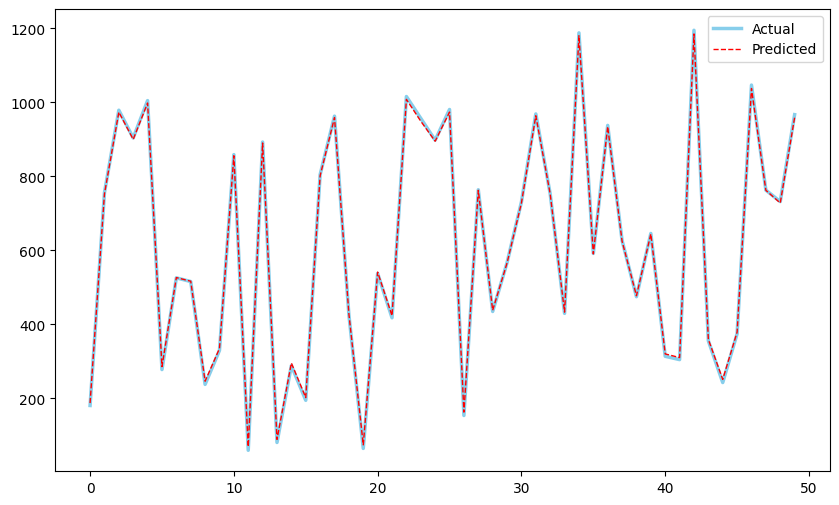

In [180]:
plt.figure(figsize=(10,6))
plt.plot(df['Y_test'][:50], color='skyblue', linewidth=2.5)
plt.plot(df['Y_pred'][:50], linestyle='--', color='red', linewidth=1)
plt.legend(['Actual', 'Predicted'])
plt.show()

In [151]:
pd.DataFrame(model.coef_ ,airbnb2_df.columns[:-1] , columns=['Coefficient'])

,Coefficient
host_identity_verified,0.004022
neighbourhood_group,0.004390
instant_bookable,-0.005692
cancellation_policy,0.018398
room_type,0.008312
construction_year,-0.018076
price,569.969182
service_fee,-0.000224
minimum_nights,0.005862
number_of_reviews,-0.000752


Scatter plot

In [152]:
Y_test

array([181., 756., 979., ..., 143., 928., 929.])

In [153]:
Y_pred

array([187.66366382, 752.73714471, 973.85107969, ..., 153.29813882,
       924.71426948, 924.70536476])

<Axes: >

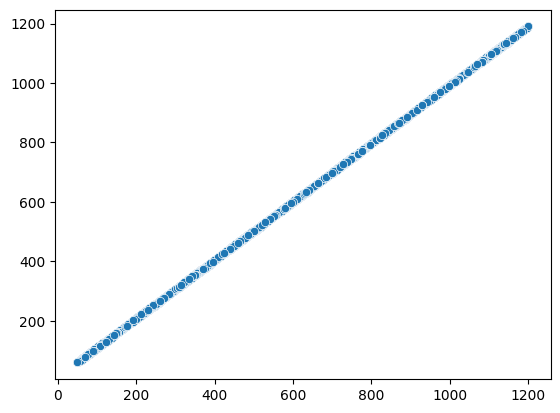

In [154]:
sns.scatterplot(x=Y_test, y=Y_pred)

since the `price` varibaile is correlated only with the `service_fee` variable the linear regression model produces this result in which the plots in the scatterplot follow an ascending diagonal reatta line

In [155]:
intercept = model.intercept_
coefficients = model.coef_
print("Regression line equation:")
print("Y = {:.2f} + {:.3f} * X".format(intercept, coefficients[0]))


Regression line equation:
Y = 624.99 + 0.004 * X


<Axes: ylabel='Count'>

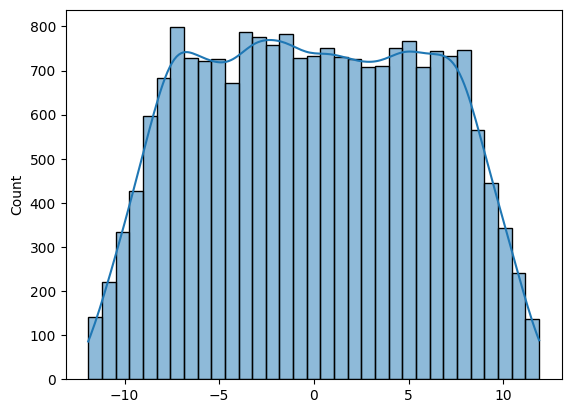

In [156]:
# Plot of the distribution of residuals
residuals = Y_test - Y_pred
sns.histplot(residuals, kde=True)


## Classification

I want to make predictions about the varibaile room_type, i.e., the type of airbnb offered by hosts, in order to help them adjust their marketing strategies or make changes to their Airbnb based on the prevailing demands in the market and to analyze the competition. Airbnb could also tailor recommendations to users using predictions about the room types offered for example by suggesting ads to platform users that match the preferred room type based on their past experiences.

In [157]:
#import libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In this model the target variable `room type` must be categorical so I create another copy of the initial *airbnb_df* dataframe and then delete the categorical columns that I am not interested in

In [158]:
airbnb3_df = airbnb_df.copy()
airbnb3_df.drop(columns=['id', 'name', 'neighbourhood','host_name','host_id', 'lat', 'long', 'country', 'country_code'], inplace=True)

In [159]:
airbnb3_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102113 entries, 0 to 102598
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   host_identity_verified          102113 non-null  int64  
 1   neighbourhood_group             102113 non-null  int64  
 2   instant_bookable                102113 non-null  int64  
 3   cancellation_policy             102113 non-null  int64  
 4   room_type                       102113 non-null  object 
 5   construction_year               102113 non-null  float64
 6   price                           102113 non-null  float64
 7   service_fee                     102113 non-null  float64
 8   minimum_nights                  102113 non-null  float64
 9   number_of_reviews               102113 non-null  float64
 10  review_rate_number              102113 non-null  float64
 11  calculated_host_listings_count  102113 non-null  float64
 12  availability_365

In [160]:
# Split dataset to X and Y variables
X1 = airbnb3_df.drop(columns=['room_type'], axis=1)  # Exclude the target variable "room_type"
Y1 = airbnb3_df['room_type']

In [161]:
# Divide the data into training and test sets
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=101)

In [162]:
# Define the RandomForestClassifier model
model1 = RandomForestClassifier(n_estimators=100, random_state=42)

In [163]:
#  build the training model
model1.fit(X1_train, Y1_train)

RandomForestClassifier(random_state=42)

In [164]:
# apply the trained model to make prediction on test set
Y1_pred = model1.predict(X1_test)

In [165]:
# Evaluates the performance of the model
accuracy = accuracy_score(Y1_test, Y1_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7705528081085051


In [166]:
df1 = pd.DataFrame({"Y_test": Y1_test, "Y_pred": Y1_pred})
df1.head(20)

,Y_test,Y_pred
3643,Entire home/apt,Private room
52111,Entire home/apt,Entire home/apt
8990,Entire home/apt,Entire home/apt
99393,Entire home/apt,Entire home/apt
36571,Private room,Private room
6227,Private room,Private room
56928,Entire home/apt,Entire home/apt
44857,Entire home/apt,Entire home/apt
49816,Entire home/apt,Entire home/apt
6922,Entire home/apt,Entire home/apt


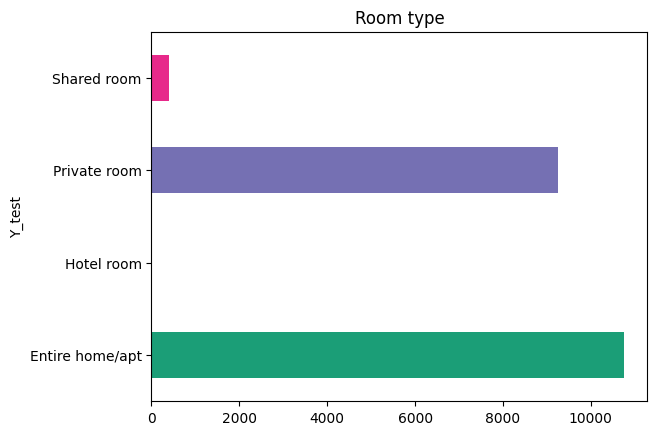

In [167]:
df1.groupby('Y_test').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Room type')
plt.show()

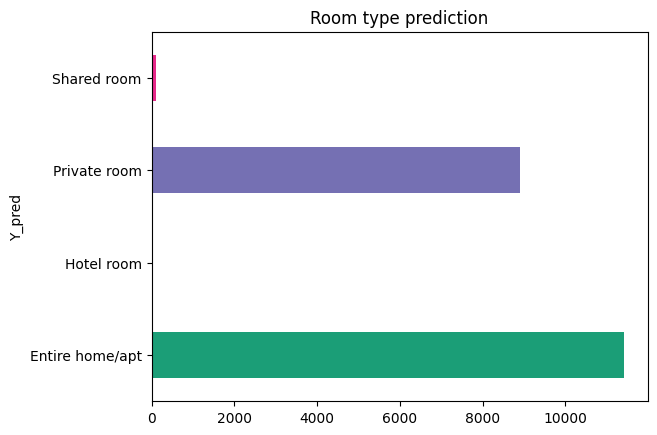

In [168]:
df1.groupby('Y_pred').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.title('Room type prediction')
plt.show()

And I want to see also the accuracy of this model in a bar plot

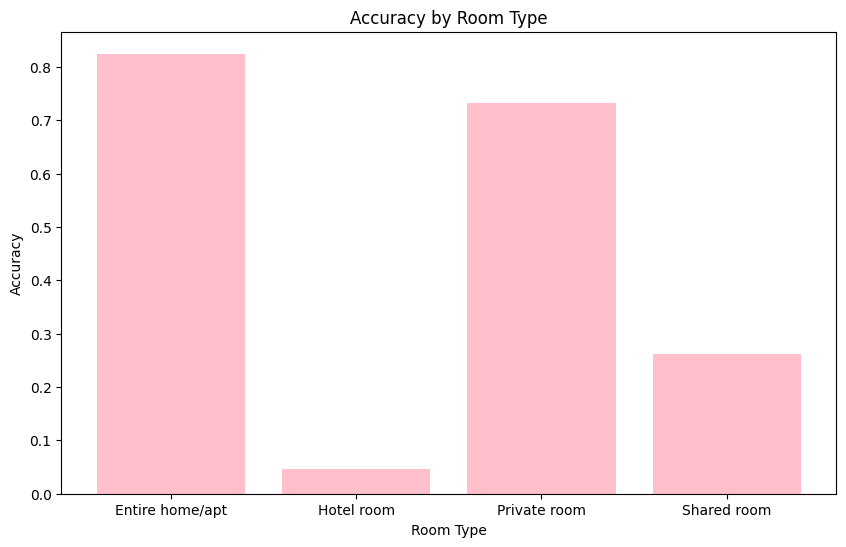

In [169]:
# Calculates classification accuracy for each class.
class_accuracy = {}
for i, class_name in enumerate(model1.classes_):
    correct_predictions = np.sum((Y1_test == class_name) & (Y1_pred == class_name))
    total_predictions = np.sum(Y1_test == class_name)
    class_accuracy[class_name] = correct_predictions / total_predictions

# Bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_accuracy.keys(), class_accuracy.values(), color='pink')
plt.xlabel('Room Type')
plt.ylabel('Accuracy')
plt.title('Accuracy by Room Type')
plt.xticks(rotation=0)
plt.show()
